In [1]:
# Comparison of anti-cancer skin treatment Capomulin versus other skin cancer treatment performed on 249 mice.
# A 45 days study that observed and measured scc tumor growths in mice to determine the efficacy of Capomulin compared to other treatment regimens.
# A summary of observations and insights using tables and figures to present the study results:
#                Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data.
#                  (Include these observation at the top of notebook)

In [2]:
# Interactive charting with %matplotlib notebook wasn't include because we will be creating multiple plots in a single notebook/lab w/o turning off interactive window.
# Import dependencies

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
import os

In [3]:
# 1. Check the data for any mouse ID with duplicate timepoints and remove any data associated with that mouse ID.

# pd.set_option('display.max_rows', None)
df = pd.read_csv(os.path.join("Resources", "Study_results.csv"))
# df.duplicated()
study_resultsedit = df.drop_duplicates()

# pd.set_option('display.max_rows', None)
# df = pd.read_csv(os.path.join("Resources", "Mouse_metadata.csv"))
# df.duplicated()
# # study_resultsedit = df.drop_duplicates()

In [17]:
# (1.Continued) Merging two relational data sets 
# Load from Resource folder and Read CSV files with mouse metada and study results (split into 2 files) 
# test with df.head and df.describe to make sure data loading properly
# file_to_load = "Resources/Mouse_metadata.csv"
# file_to_load_two = "Resources/Study_results.csv"
# df = pd.read_csv(file_to_load)
# df = pd.read_csv(file_to_load_2)
# combine the data into a single dataset using merge function


mouse_metadata_one = pd.read_csv(os.path.join("Resources", "Mouse_metadata.csv"))
# study_results_two = pd.read_csv(os.path.join("Resources", "Study_results.csv"))

combine_mouse_study = pd.merge(mouse_metadata_one, study_resultsedit, on="Mouse ID")
# combine_mouse_study
combine_mouse_study.head(15)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [5]:
# 2. Generate a summary statistics table consisting of the mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen.
# Use Pandas Groupby.agg() function on a groupby - Multiple aggregations of the same column using combine_mouse_study which is the merge dataset

# df = combine_mouse_study
# df.aggregate(["mean", "median", "var", "std"]), these two df statements will be for each column alone.
# combine_mouse_study.groupby("Drug Regimen", as_index=False).agg({"Age_months": [np.mean, np.median, np.var, np.std],})

# combine_mouse_study.groupby("Drug Regimen", as_index=False).agg({"Age_months": "median"})


df = combine_mouse_study.copy()
# df.style.set_caption("Tumor Volume Summary Statistics")
print("                     Tumor Volume Summary Statistics")
df.groupby("Drug Regimen")["Tumor Volume (mm3)"].aggregate(["mean", "median", "var", "std", "sem"])


# df = combine_mouse_study 
# df.groupby("Drug Regimen").agg(["mean", "median", "var", "std"])


# df.groupby("Drug Regimen", as_index=False).aggregate(["mean", "median", "var", "std"])
# Want tumor volume only and SEM??


                     Tumor Volume Summary Statistics


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Text(0, 0.5, 'Total Mice for each Drug')

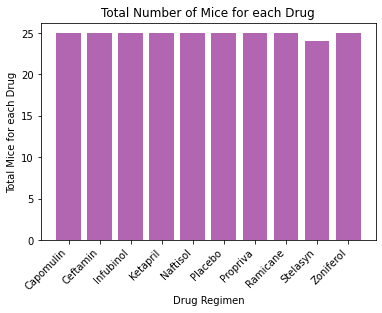

In [62]:
# 3. Create a bar plot using Matplotlib' pyplot that shows the number of total mice for each treatment regimen
#    throughout the course of study.
# Matplotlib.pyplot.bar:
# x_axis = np.arange(len(total_mice))
# df.total_mice = np.arange(len("Mouse ID"))

# df.groupby("Mouse ID").nunique().count()
# df = combine_mouse_study.copy()
# treatment = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
# total_mice = ["Mouse ID"]


x_axis = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
dfplot = df.groupby("Drug Regimen").nunique()["Mouse ID"]

plt.bar(x_axis, dfplot, color="purple", alpha=0.6)
plt.title("Total Number of Mice for each Drug")
plt.xticks(x_axis, rotation=45, ha ="right")
plt.xlim()
plt.ylim()
plt.xlabel("Drug Regimen")
plt.ylabel("Total Mice for each Drug")

<AxesSubplot:xlabel='Drug Regimen'>

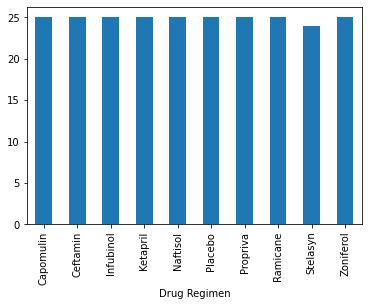

In [7]:
# 3B. Create a bar plot using both Panda's DataFrame.plot() that shows the number of total mice for each treatment regimen throughout the course of study

# treatment = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"

# df = pd.DataFrame({"Drug Regimen", "Mouse ID"})
# df.total_mice = np.arange(len("Mouse ID"))
             
             
# x_axis = np.arange(len(total_mice))
# plotdata[x_axis, "treatment"].plot(kind="bar")


dfplot.plot.bar()

([<matplotlib.patches.Wedge at 0x2b6a427e788>,
 [Text(-0.006939175976765929, -1.0999781124353174, 'Female'),
  Text(0.008516261426031077, 1.3499731379887985, 'Male')],
 [Text(-0.003785005078235961, -0.5999880613283548, '49.799%'),
  Text(0.005362090527501048, 0.849983086881836, '50.201%')])

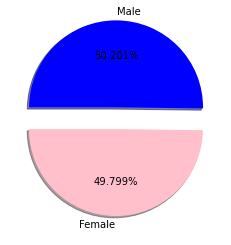

In [8]:
# 4A. Generate a pie plot using Matplotlib' pyplot that shows the distribution of female or male mice in the study.

#labels for the sections of pie chart
labels = ["Female", "Male"]

dfsexcount = mouse_metadata_one.groupby("Sex")["Mouse ID"].count()
dfsexcount
# The values of each section of the pie chart
sizes = [dfsexcount[0], dfsexcount[1]]
# # The colors of each section of the pie chart
colors = ["pink", "blue"]
# # Tells matplotlib to separate the "Male" section from the others
explode = [0, 0.25]

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.3f%%", shadow=True, startangle=180)



<AxesSubplot:title={'center':'Sex Distribution in Study'}, ylabel='Mouse ID'>

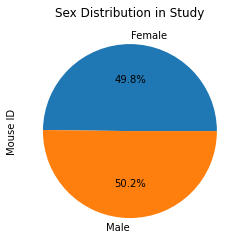

In [66]:
# 4B. Generate a pie plot using Panda's DataFrame.plot() that shows the distribution of female or male mice in the study.

# labels for the sections of pie chart
# labels = []

# The values of each section of the pie chart
# sizes = []
# The colors of each section of the pie chart
# colors = []
# Tells matplotlib to separate the "Smurfs"section from the others
# explode = []

# dfsexcount.plot.pie(y='hours', title="Title", legend=False, \
#                    autopct='%1.1f%%', explode=(0, 0, 0.1), \
#                    shadow=True, startangle=0)

dfsexcount.plot.pie(title="Sex Distribution in Study", \
                   autopct='%1.1f%%')


In [86]:
# 5. Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: 
#    Capomulin, Ramicane, Infubinol, and Ceftamin. 
#    Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across
#    all four treatment regimens.


capomulin = df.loc[df["Drug Regimen"] =="Capomulin"] 

capotreatment = capomulin.quantile([0.25, 0.75])
capotreatment = df["Tumor Volume (mm3)"].quantile([0.25, 0.75])
capotreatment[0.25]

IQR = capotreatment[0.75] - capotreatment[0.25]

lower_bound = round(capotreatment[0.25]- (1.5*IQR), 2) 
upper_bound = round(capotreatment[0.75] + (1.5*IQR), 2)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outliers = capomulin.loc[capomulin["Tumor Volume (mm3)"] < lower_bound] # or (capomulin["Tumor Volume (mm3)"] > upper_bound)] 
outliers




Values below 28.05 could be outliers.
Values above 73.25 could be outliers.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


TypeError: cannot perform reduce with flexible type

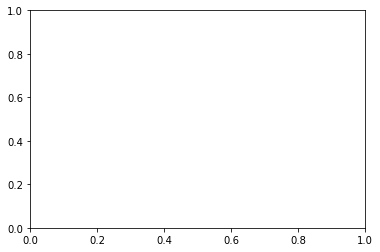

In [11]:
# 6. Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment regimens
#    and highlight any potential outliers in the plot by changing their color and style.


# Create boxplot
plt.boxplot("tumorvolumes")
# Set the size of the plot (width, height) 
plt.figure(figsize=(10,5))

# Set title/labels
plt.title("Final Tumor volume for Capomulin, Ramicane, Infubinol, and Ceftamin")
plt.ylabel("Final Tumor Volume")





In [12]:
# 7. Select a mouse that was treated with Capomulin and generate a line plot of tumor volume vs. time point for that mouse.

# x = np.linspace(-1, 1, 50)
# print(x)
# y = 2*x + 1
# plt.plot(x, y)
# plt.show()

capomulinmouse = combine_mouse_study.copy().groupby("Drug Regimen")["Mouse ID"]
np = combine_mouse_study.copy()
x = np.linspace(-1, 1, 50)
y = 2**x + 1

plt.title("Line Plot of Capomulin Treated Mouse (Tumor Volume versus Timepoint")
plt.xlabel("Tumor Volume(mm3")
plt.ylabel("Timepoint")
plt.plot(x, y)  
plt.show()


AttributeError: 'DataFrame' object has no attribute 'linspace'

In [13]:
# 8. Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.

x = linspace(0,3*pi,200);
y = cos(x) + rand(1,200);  
scatter(x,y)


NameError: name 'linspace' is not defined

In [ ]:
# 9. Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume
#    for the Capomulin treatment.
     Plot the linear regression model on top of the previous scatter plot.

corr = capomulinmouse()
print(f"The correlation coefficient between mouse weight and average tumor volume is {round(corr[0], 2)}")
print(f"The correlation p-val between mouse weight and average tumor volume is {corr[1]}")


# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregression(x_values, y_values)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope, 2) + "x + " + str(round(intercept, 2))
                       
# Plot scatter plot
plt.scatter(x_values, y_values)
                       

# Plot Regression line
plt.plot(x_values, regress_values, "r-")                      
                       
                       
# Label plot
plt.xlabel()
plt.ylabel()

# Print r square value
print(f"R squared: {rvalue**2}")
                       
# Show plot
plt.show()
                       
                       
                       
                       
                       

In [ ]:
# 10. Look across all previously generated figures and tables and write at least three observations or inferences 
#     that can be made from the data. Include these obserationat the top o notebook.
